
# TP1: vision_computadora_I (21Co2025)

# Integrantes

1. Sebastian Biagiola
2. Erlin Rey
3. Santiago Casado
5. Daniel Bazán
6. Jonathan Matias Borda

Parte 1 (imágenes en /white_patch):
1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
2. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de
White patch

Parte 2:
1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y
visualizarlas.
2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas
entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección
de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

## Parte 1 (imágenes en /white_patch):
###1. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

## Parte 2:
### 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.

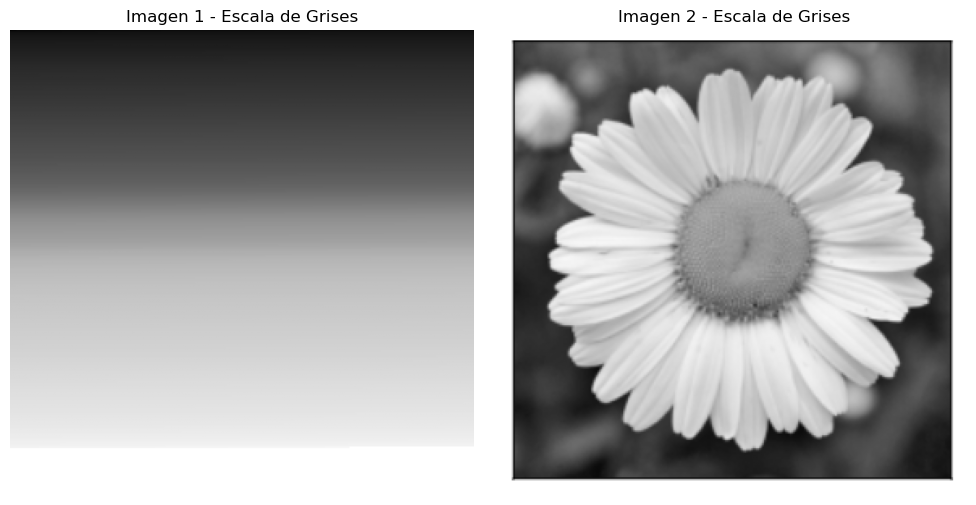

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np

# Cargar las imágenes
img1_path = 'img1_tp.png'
img2_path = 'img2_tp.png'

# Leer y visualizar las imágenes en escala de grises
try:
    img1_gray = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2_gray = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    if img1_gray is None or img2_gray is None:
        raise FileNotFoundError("Una o ambas imágenes no se pudieron cargar.")

    # Crear una figura con dos subplots para mostrar ambas imágenes
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Visualizar la primera imagen
    axes[0].imshow(img1_gray, cmap='gray')
    axes[0].set_title('Imagen 1 - Escala de Grises')
    axes[0].axis('off')

    # Visualizar la segunda imagen
    axes[1].imshow(img2_gray, cmap='gray')
    axes[1].set_title('Imagen 2 - Escala de Grises')
    axes[1].axis('off')
    
    # Ajustar el diseño y mostrar la figura
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)
    print(f"Verifica que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")
    print(f"Asegúrate de que los archivos '{os.path.basename(img1_path)}' y '{os.path.basename(img2_path)}' estén en el directorio correcto.")

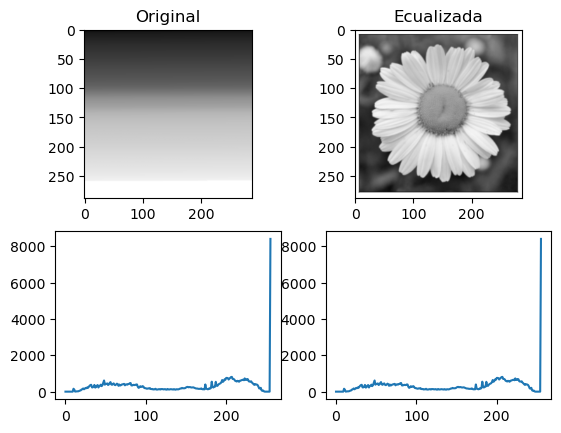

In [10]:
# Nueva figura
fig = plt.figure()

# Imagen original
ax1=plt.subplot(221)
ax1.imshow(img1_gray, cmap='gray', vmin=0, vmax=255)
ax1.set_title('Original')

hist1,bins1 = np.histogram(img1_gray.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen ecualizada
ax2=plt.subplot(222)
ax2.imshow(img2_gray, cmap='gray', vmin=0, vmax=255)
ax2.set_title('Ecualizada')

hist2,bins2 = np.histogram(img2_gray.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)

plt.show()

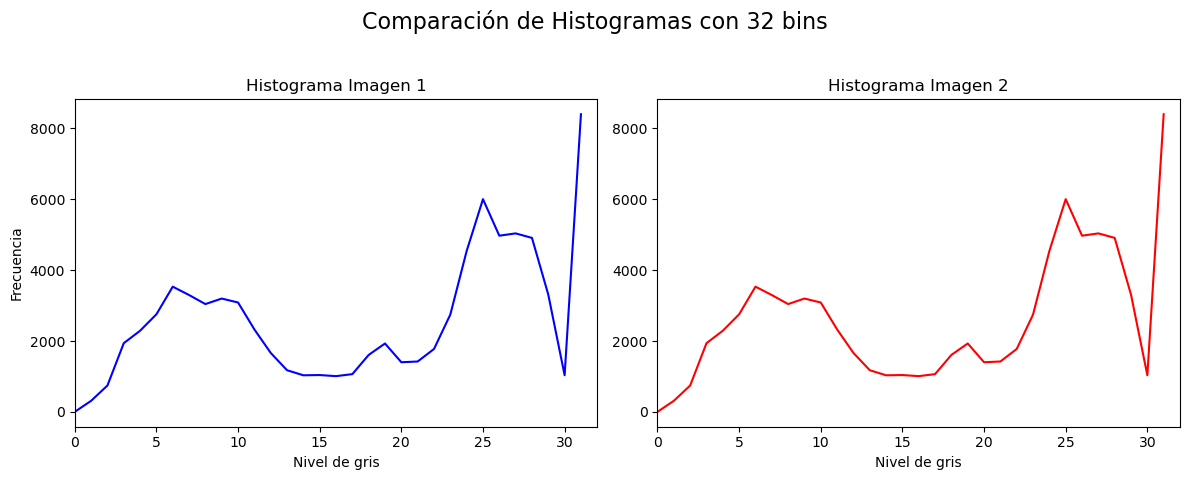

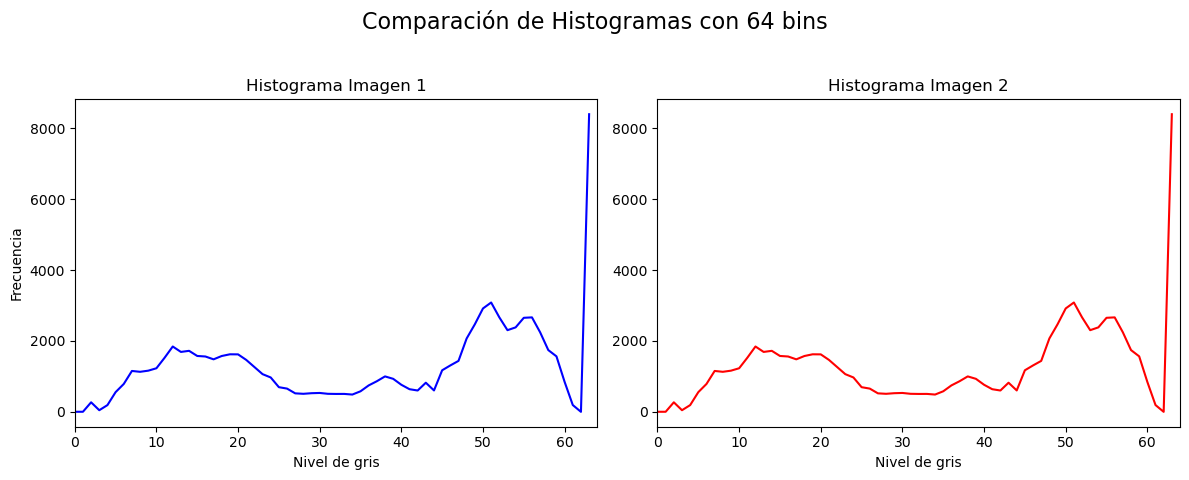

In [ ]:
bin_options = [32, 64]

# Probando diferntes bins
for bins in bin_options:
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Comparación de Histogramas con {bins} bins', fontsize=16)

    # Histograma para la Imagen 1
    plt.subplot(1, 2, 1)
    hist1, _ = np.histogram(img1_gray.ravel(), bins, [0, 256])
    plt.plot(hist1, color='blue')
    plt.title('Histograma Imagen 1')
    plt.xlabel('Nivel de gris')
    plt.ylabel('Frecuencia')
    plt.xlim([0, bins])

    # Histograma para la Imagen 2
    plt.subplot(1, 2, 2)
    hist2, _ = np.histogram(img2_gray.ravel(), bins, [0, 256])
    plt.plot(hist2, color='red')
    plt.title('Histograma Imagen 2')
    plt.xlabel('Nivel de gris')
    plt.xlim([0, bins])

    # Ajustar el diseño y mostrar la figura
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()